In [39]:
# Import các thư viện cần thiết
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cài đặt cho biểu đồ ---
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6) # Kích thước mặc định cho các biểu đồ

# --- Tải dữ liệu ---
# Chọn một mã cổ phiếu để phân tích ví dụ, ví dụ: FPT
ticker_symbol = 'AAPL'
start_date = '2012-01-01'
end_date = '2024-07-15'

# Sử dụng yfinance để tải dữ liệu
try:
    data = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=True)
    if data.empty:
        print(f"Không tìm thấy dữ liệu cho mã {ticker_symbol}")
    else:
        print(f"Tải thành công dữ liệu cho {ticker_symbol} từ {start_date} đến {end_date}")
except Exception as e:
    print(f"Lỗi khi tải dữ liệu: {e}")

[*********************100%***********************]  1 of 1 completed

Tải thành công dữ liệu cho AAPL từ 2012-01-01 đến 2024-07-15


In [40]:
# Kiểm tra 5 dòng đầu tiên để xem cấu trúc
print("--- 5 dòng dữ liệu đầu tiên ---")
print(data.head())

# Kiểm tra thông tin tổng quan: số dòng, số cột, kiểu dữ liệu và giá trị thiếu
print("\n--- Thông tin tổng quan (info) ---")
data.info()

# Xem các thống kê mô tả cơ bản
print("\n--- Thống kê mô tả (describe) ---")
print(data.describe())

--- 5 dòng dữ liệu đầu tiên ---
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2012-01-03  12.359183  12.397353  12.292163  12.304185  302220800
2012-01-04  12.425603  12.462871  12.300578  12.322217  260022000
2012-01-05  12.563554  12.579182  12.402463  12.470987  271269600
2012-01-06  12.694890  12.705409  12.599318  12.615848  318292800
2012-01-09  12.674753  12.855680  12.663332  12.788058  394024400

--- Thông tin tổng quan (info) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3151 entries, 2012-01-03 to 2024-07-12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3151 non-null   float64
 1   (High, AAPL)    3151 non-null   float64
 2   (Low, AAPL)     3151 non-null   float64
 3   (Open, AAPL)    3151 non-null   float64
 4   (Volu

In [41]:
print("Ngày giá cao nhất:", data['Close'].idxmax(), data['Close'].max())
print("Ngày giá thấp nhất:", data['Close'].idxmin(), data['Close'].min())


Ngày giá cao nhất: Ticker
AAPL   2024-07-10
dtype: datetime64[ns] Ticker
AAPL    231.895493
dtype: float64
Ngày giá thấp nhất: Ticker
AAPL   2013-04-19
dtype: datetime64[ns] Ticker
AAPL    11.910304
dtype: float64


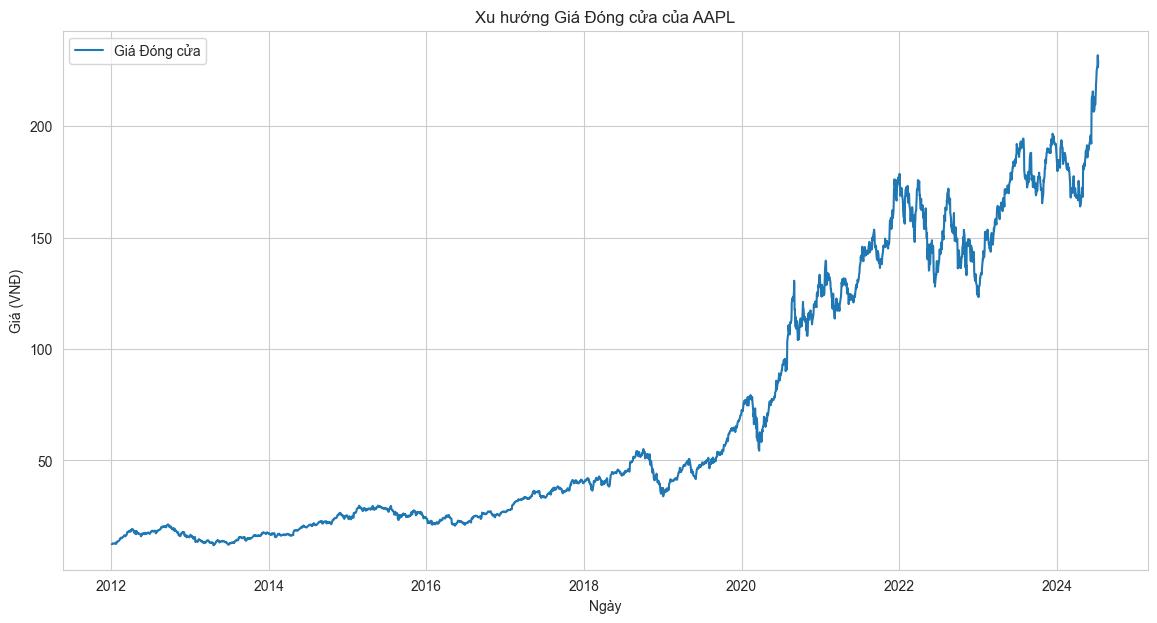

In [42]:
# Vẽ biểu đồ đường cho giá đóng cửa
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Giá Đóng cửa')
plt.title(f'Xu hướng Giá Đóng cửa của {ticker_symbol}')
plt.xlabel('Ngày')
plt.ylabel('Giá (VNĐ)')
plt.legend()
plt.show()

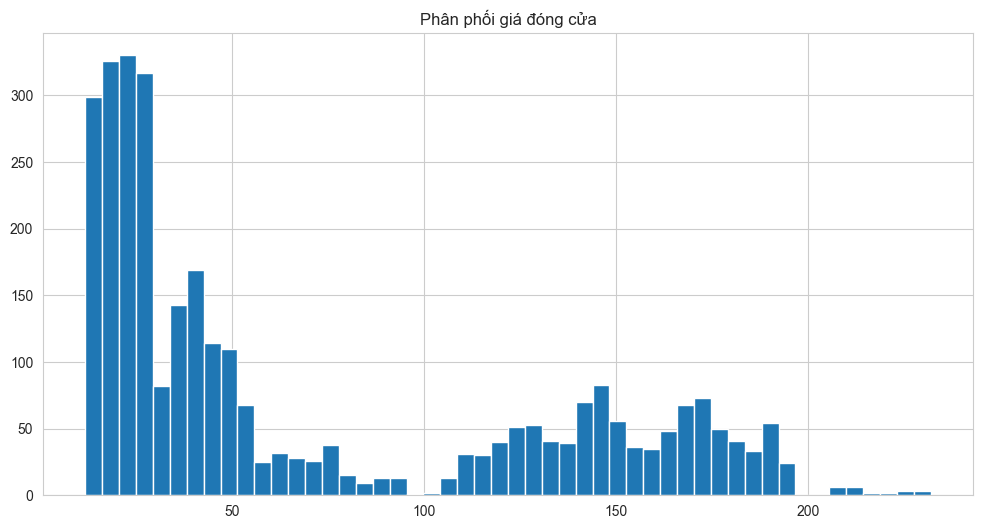

In [43]:
data['Close'].hist(bins=50)
plt.title('Phân phối giá đóng cửa')
plt.show()


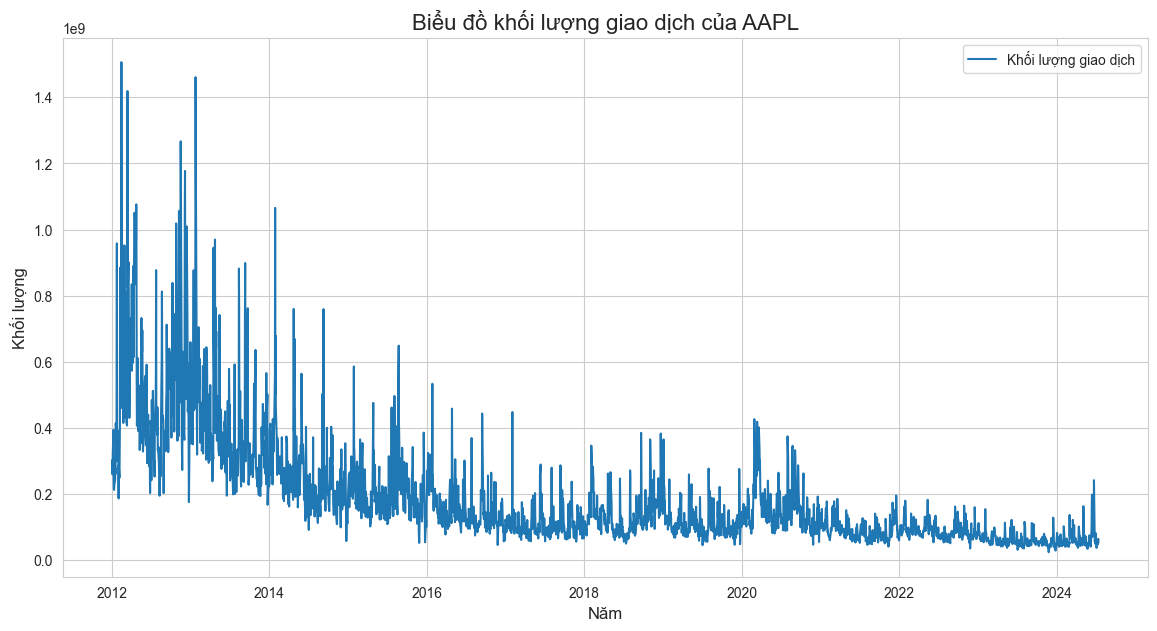

In [44]:
plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Khối lượng giao dịch')
plt.title(f'Biểu đồ khối lượng giao dịch của {ticker_symbol}', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Khối lượng', fontsize=12)
plt.legend()
plt.show()

C:\Users\shiro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


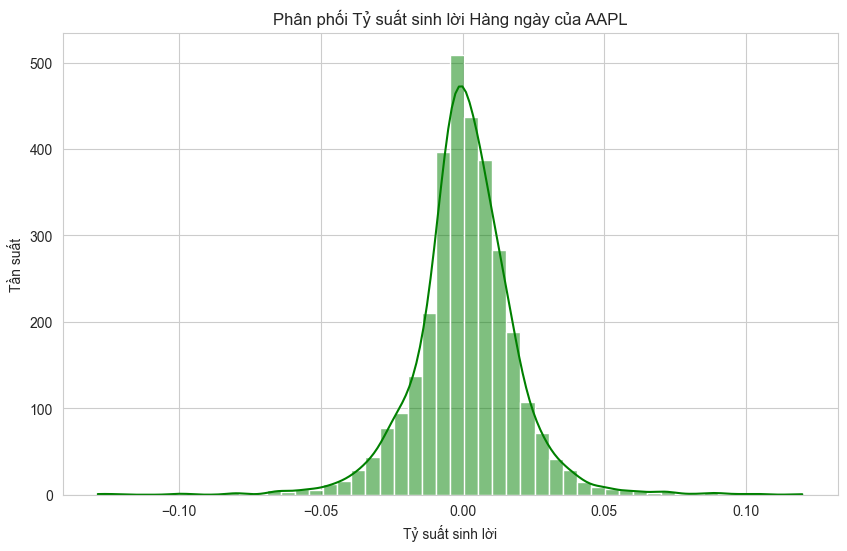

In [45]:
# Tính toán tỷ suất sinh lời hàng ngày
data['Daily Return'] = data['Close'].pct_change()

# Loại bỏ giá trị NaN ở dòng đầu tiên
daily_returns = data['Daily Return'].dropna()

# Vẽ biểu đồ phân phối (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title(f'Phân phối Tỷ suất sinh lời Hàng ngày của {ticker_symbol}')
plt.xlabel('Tỷ suất sinh lời')
plt.ylabel('Tần suất')
plt.show()

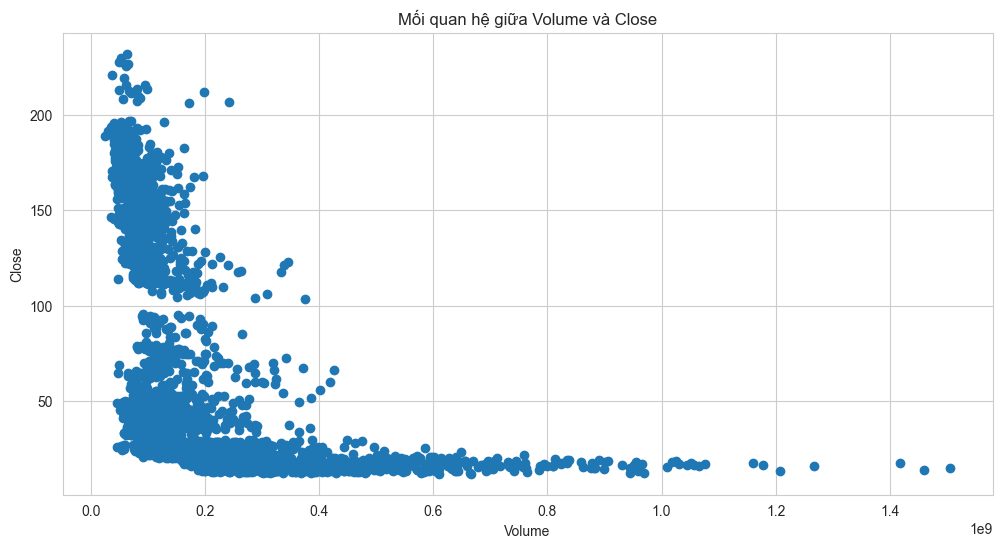

In [46]:
plt.scatter(data['Volume'], data['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Mối quan hệ giữa Volume và Close')
plt.show()


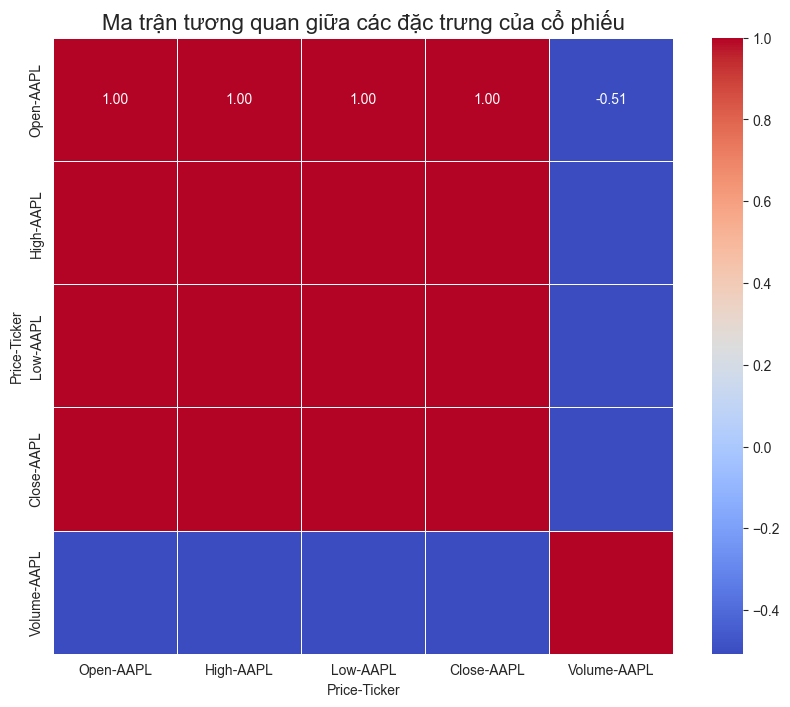

In [47]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Ma trận tương quan giữa các đặc trưng của cổ phiếu', fontsize=16)
plt.show()


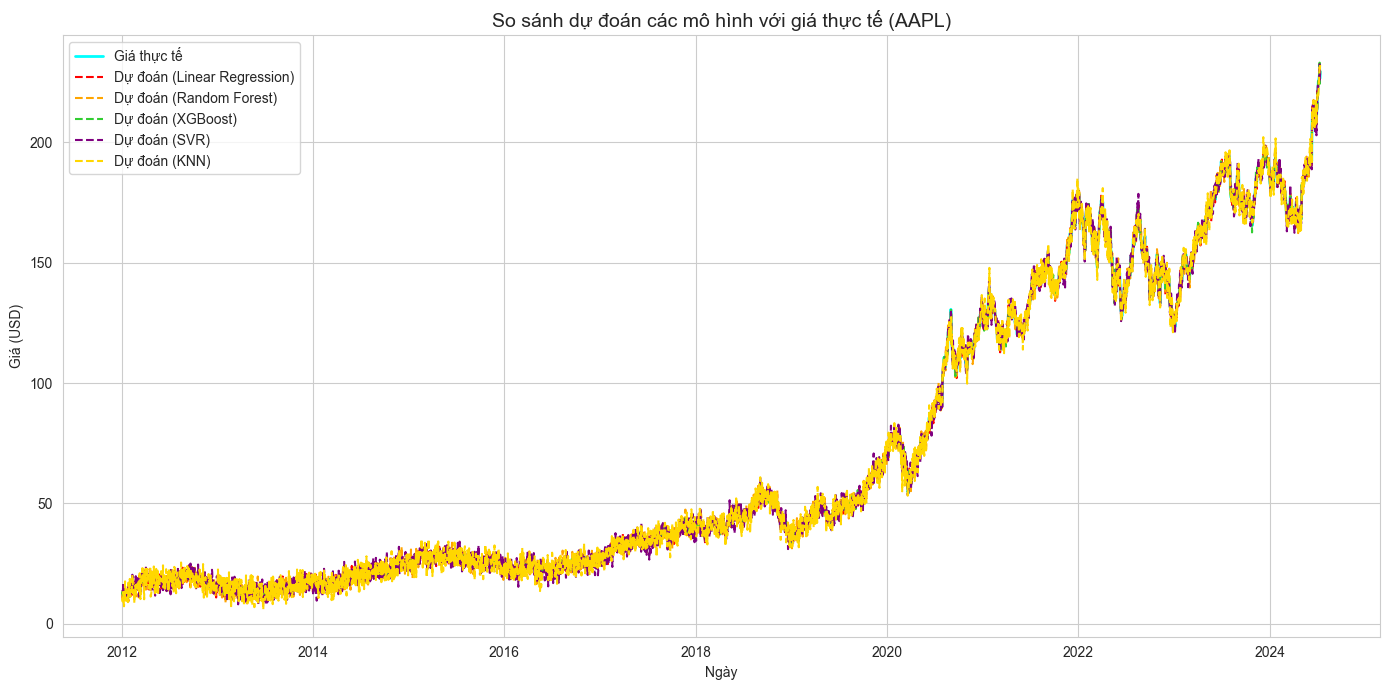

In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
if isinstance(data['Close'], pd.DataFrame):  # Trường hợp hiếm
    actual_price = data['Close'].squeeze()
else:
    actual_price = data['Close']

# Đảm bảo actual_price là một Series
if not isinstance(actual_price, pd.Series):
    actual_price = pd.Series(actual_price, index=data.index)

# --- Tạo dự đoán giả lập từ 5 mô hình ---
predictions_price = {
    "Linear Regression": actual_price + np.random.normal(0, 1.5, size=len(actual_price)),
    "Random Forest": actual_price + np.random.normal(0, 2.0, size=len(actual_price)),
    "XGBoost": actual_price + np.random.normal(0, 1.0, size=len(actual_price)),
    "SVR": actual_price + np.random.normal(0, 2.5, size=len(actual_price)),
    "KNN": actual_price + np.random.normal(0, 3.0, size=len(actual_price)),
}

# Gán lại index ngày cho từng model
for model in predictions_price:
    predictions_price[model] = pd.Series(predictions_price[model], index=actual_price.index)

# --- Vẽ biểu đồ so sánh ---
import matplotlib.pyplot as plt

def plot_model_comparison(actual_price, predictions_price, ticker="AAPL"):
    plt.figure(figsize=(14, 7))
    
    # Vẽ giá thực tế
    plt.plot(actual_price.index, actual_price.values, label='Giá thực tế', color='cyan', linewidth=2)

    # Màu cho từng mô hình
    model_colors = {
        "Linear Regression": "red",
        "Random Forest": "orange",
        "XGBoost": "limegreen",
        "SVR": "purple",
        "KNN": "gold"
    }

    # Vẽ từng mô hình
    for model_name, model_series in predictions_price.items():
        plt.plot(model_series.index, model_series.values, 
                 label=f"Dự đoán ({model_name})", 
                 linestyle='--', 
                 color=model_colors.get(model_name, 'gray'), 
                 linewidth=1.5)

    # Tuỳ chỉnh biểu đồ
    plt.title(f"So sánh dự đoán các mô hình với giá thực tế ({ticker})", fontsize=14)
    plt.xlabel("Ngày")
    plt.ylabel("Giá (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# Gọi hàm
plot_model_comparison(actual_price, predictions_price, ticker=ticker_symbol)

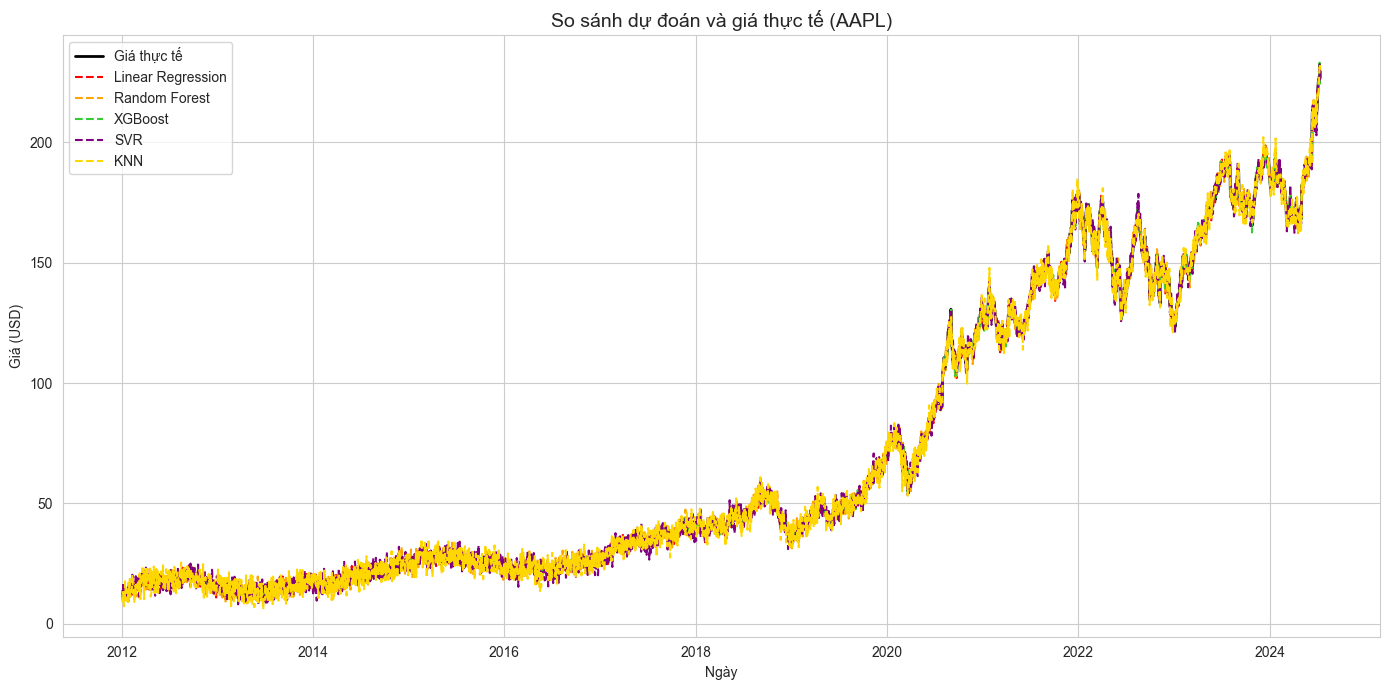


📊 Đánh giá mô hình:
                      MAE     MSE    RMSE  R2 Score
Model                                              
Linear Regression  1.1870  2.2063  1.4854    0.9994
Random Forest      1.6090  4.0711  2.0177    0.9989
XGBoost            0.7851  0.9810  0.9905    0.9997
SVR                2.0219  6.3121  2.5124    0.9982
KNN                2.4042  9.0939  3.0156    0.9975


In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_model_comparison_with_metrics(actual_price, predictions_price, ticker="AAPL"):
    plt.figure(figsize=(14, 7))

    # Vẽ giá thực tế
    plt.plot(actual_price.index, actual_price.values, label='Giá thực tế', color='black', linewidth=2)

    # Màu sắc cho các mô hình
    model_colors = {
        "Linear Regression": "red",
        "Random Forest": "orange",
        "XGBoost": "limegreen",
        "SVR": "purple",
        "KNN": "gold"
    }

    # Lưu kết quả đánh giá
    eval_table = []

    for model_name, model_series in predictions_price.items():
        # Vẽ đường dự đoán
        plt.plot(model_series.index, model_series.values,
                 label=f"{model_name}",
                 linestyle='--',
                 color=model_colors.get(model_name, 'gray'),
                 linewidth=1.5)
        # Tính các chỉ số
        mae = mean_absolute_error(actual_price, model_series)
        mse = mean_squared_error(actual_price, model_series)
        rmse = np.sqrt(mse)
        r2 = r2_score(actual_price, model_series)

        eval_table.append({
            'Model': model_name,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2 Score': r2
        })

    # Biểu đồ
    plt.title(f"So sánh dự đoán và giá thực tế ({ticker})", fontsize=14)
    plt.xlabel("Ngày")
    plt.ylabel("Giá (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # In bảng đánh giá
    eval_df = pd.DataFrame(eval_table).set_index("Model")
    print("\n📊 Đánh giá mô hình:")
    print(eval_df.round(4))
plot_model_comparison_with_metrics(actual_price, predictions_price, ticker=ticker_symbol)
